<a href="https://colab.research.google.com/github/Prajwal-ak-0/AI/blob/master/2_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [42]:
from sklearn.datasets import make_circles
X, y = make_circles(1000, noise=0.05, random_state=42, factor=0.5)



*   The `factor` parameter influences how closely the two circles are. A small factor result in a clear separation between the two circles, while a larger `factor` makes the separation less distinct.
*   The `noise` parameter makes the dataset more or less "**messy**." High noise can make the dataset more challenging to classify, as the points are less clearly defined by their respective circles. Low `noise` makes the dataset more orderly and easier to classify, as the points are more tightly clustered around their circles.



In [43]:
X.shape, y.shape

((1000, 2), (1000,))



*   X - There are 1000 dataset's. This are 2D data points(x, y).
*   y - is mapped to label(0 or 1).



In [44]:
import pandas as pd
circles = pd.DataFrame({"x":X[:,0], "y":X[:, 1], "label":y})
circles.head()

,x,y,label
0,0.452592,0.168433,1
1,-0.438027,0.119900,1
2,-0.532224,0.184359,1
3,-0.301402,0.400782,1
4,0.445602,-0.894936,0


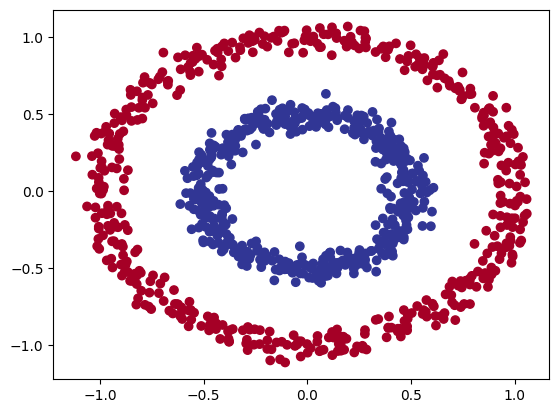

In [61]:
import matplotlib.pyplot as plt

# c=y assigns colors to the points based on the class labels in y.
# cmap specifies the color map to use for the colors. So it uses blue and red color.
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [62]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [63]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])






*   `verbose=0`: No output is displayed. The training process runs silently without showing any progress updates.

*   `verbose=1`: This is the default setting. It displays a progress bar that typically includes information such as the current epoch number, the loss value, and any metrics you are tracking.

*   `verbose=2`: This setting displays one line of output per epoch. Each line typically includes the epoch number, the loss value, and any metrics you are tracking. This is a more condensed form of output compared to verbose=1.


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


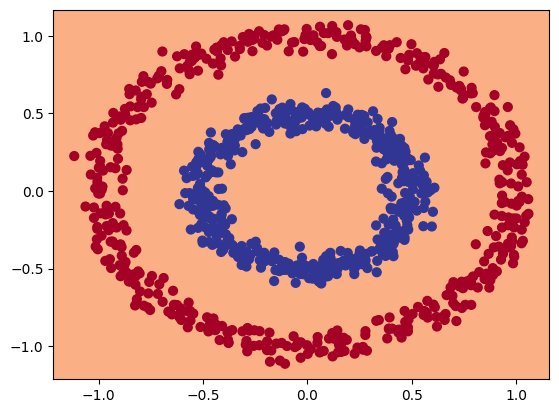

In [64]:
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)
plot_decision_boundary(model_1, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


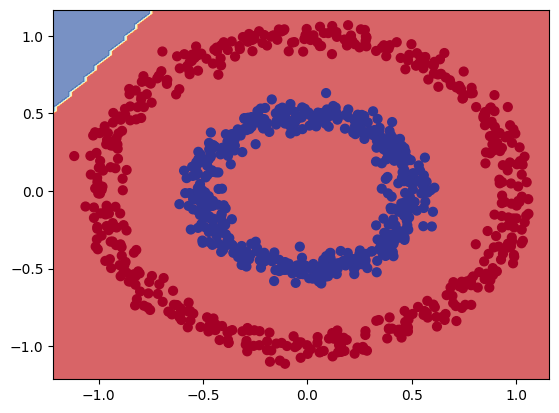

In [65]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

model_2.fit(X,y,epochs=200, verbose=0)
model_2.evaluate(X,y)
plot_decision_boundary(model_2, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


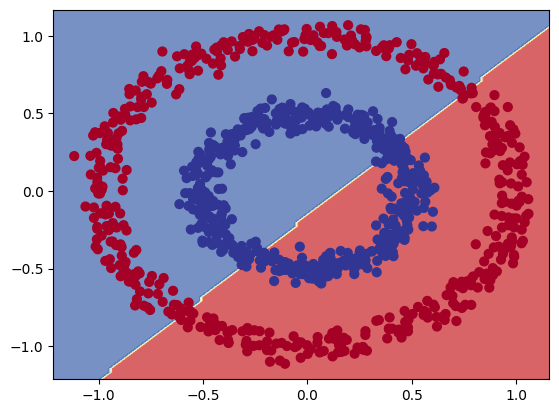

In [66]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

model_3.fit(X,y,epochs=100, verbose=0)
model_3.evaluate(X,y)
plot_decision_boundary(model_3, X, y)

**Reason** : Our model is trying distiguish the datasets by straight line. Using a straight line it is not possible to classify the above datasets.

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


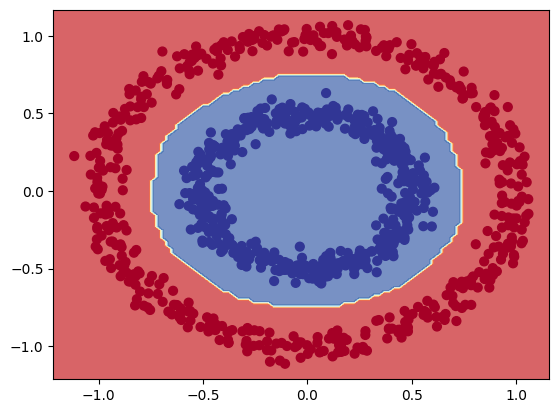

In [68]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

model_4.fit(X, y, epochs=100, verbose=0)
model_4.evaluate(X, y)
plot_decision_boundary(model_4, X, y)

### Activation Functions

**ReLU (Rectified Linear Unit)**
ReLU introduces non-linearity into the model. Its function is simple: it returns the input if the input is positive, and zero if the input is negative. Mathematically, it can be expressed as:

\[ \text{ReLU}(x) = \max(0, x) \]

ReLU is popular because it is computationally efficient.

**Sigmoid**
The sigmoid function, on the other hand, maps any input value to a value between 0 and 1. Its mathematical form is:

\[ \sigma(x) = \frac{1}{1 + e^{-x}} \]

The sigmoid function is often used in the output layer of binary classification problems because it produces a probability-like output (a value between 0 and 1) that can be interpreted as the probability of belonging to a certain class.